In [1]:

import torch
import torchvision.transforms.v2 as transforms
import torchvision.io as tv_io

import json

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [2]:
from torchvision.models import vgg16
from torchvision.models import VGG16_Weights

# load the VGG16 network *pre-trained* on the ImageNet dataset
weights = VGG16_Weights.DEFAULT
model = vgg16(weights=weights)

In [3]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
pre_trans = weights.transforms()
pre_trans

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

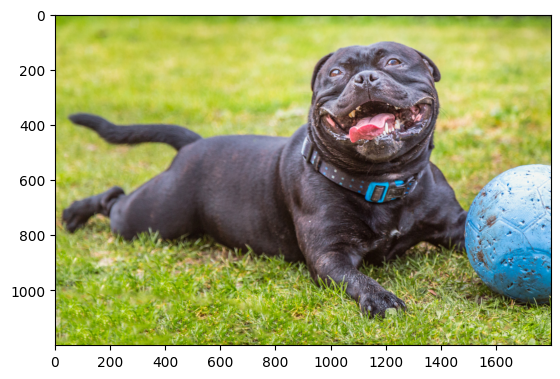

In [13]:
show_image(r"C:\Users\arora\Desktop\Desktop\Doggy Door Project\Data\happy_dog.jpg")


In [14]:
def load_and_process_image(file_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(file_path).shape)
    
    image = tv_io.read_image(file_path).to(device)
    image = pre_trans(image)  # weights.transforms()
    image = image.unsqueeze(0)  # Turn into a batch
    return image

In [16]:
processed_image = load_and_process_image(r"C:\Users\arora\Desktop\Desktop\Doggy Door Project\Data\happy_dog.jpg")
print("Processed image shape: ", processed_image.shape)

Original image shape:  (1200, 1800, 3)
Processed image shape:  torch.Size([1, 3, 224, 224])


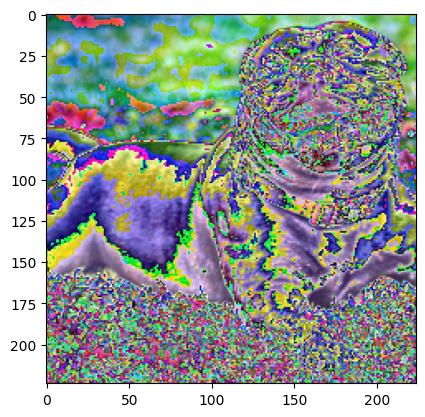

In [17]:
import torchvision.transforms.functional as F

plot_image = F.to_pil_image(torch.squeeze(processed_image))
plt.imshow(plot_image, cmap='gray')

In [19]:
vgg_classes = json.load(open(r'C:\Users\arora\Desktop\Desktop\Doggy Door Project\Data\imagenet_class_index.json'))

In [20]:
vgg_classes["0"]

['n01440764', 'tench']

In [21]:
def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    output = model(image)[0]  # Unbatch
    predictions = torch.topk(output, 3)
    indices = predictions.indices.tolist()
    # Print predictions in readable form
    out_str = "Top results: "
    pred_classes = [vgg_classes[str(idx)][1] for idx in indices]
    out_str += ", ".join(pred_classes)
    print(out_str)

    return predictions

Original image shape:  (1200, 1800, 3)
Top results: Staffordshire_bullterrier, American_Staffordshire_terrier, pug


torch.return_types.topk(
values=tensor([15.4584, 12.1626, 11.8693], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([179, 180, 254], device='cuda:0'))

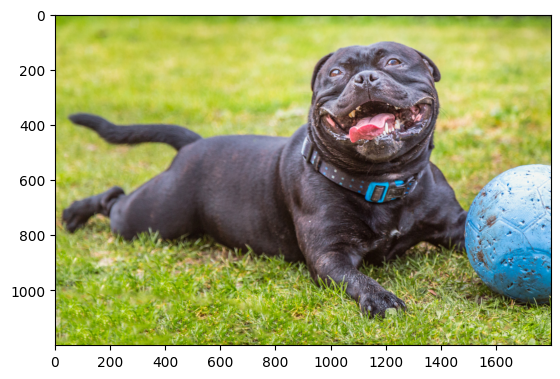

In [23]:
readable_prediction(r"C:\Users\arora\Desktop\Desktop\Doggy Door Project\Data\happy_dog.jpg")

Original image shape:  (4000, 1800, 3)
Top results: tiger_cat, tabby, lynx


torch.return_types.topk(
values=tensor([12.3785, 10.8236,  9.6427], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([282, 281, 287], device='cuda:0'))

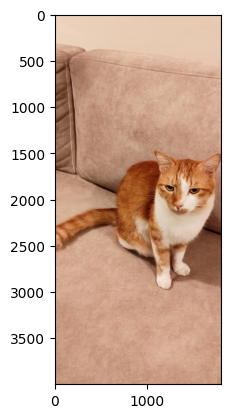

In [25]:
readable_prediction(r"C:\Users\arora\Desktop\Desktop\Mocha Cat.jpg")

In [26]:
import numpy as np

def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    idx = model(image).argmax(dim=1).item()
    print("Predicted index:", idx)
    if 151 <= idx <= 268:
        print("Doggy come on in!")
    elif 281 <= idx <= 285:
        print("Kitty stay inside!")
    else:
        print("You're not a dog! Stay outside!")

Original image shape:  (1200, 1800, 3)
Predicted index: 179
Doggy come on in!


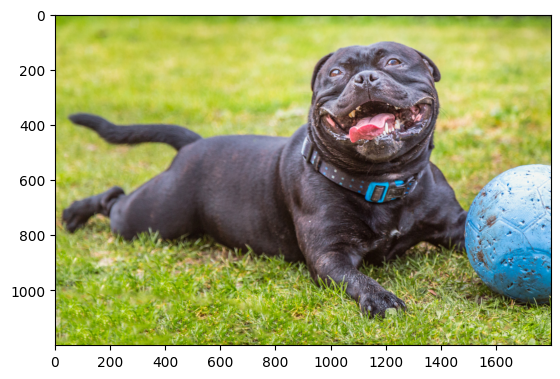

In [27]:
doggy_door(r"C:\Users\arora\Desktop\Desktop\Doggy Door Project\Data\happy_dog.jpg")

Original image shape:  (4000, 1800, 3)
Predicted index: 282
Kitty stay inside!


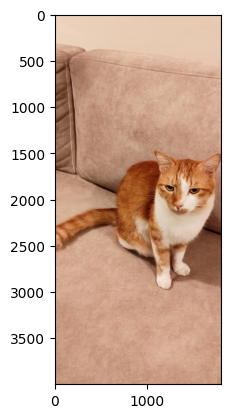

In [28]:
doggy_door(r"C:\Users\arora\Desktop\Desktop\Mocha Cat.jpg")

Original image shape:  (2592, 3456, 3)
Predicted index: 294
You're not a dog! Stay outside!


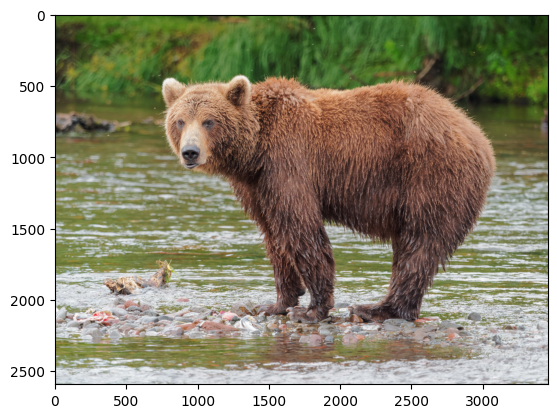

In [29]:
doggy_door(r"C:\Users\arora\Desktop\Desktop\Doggy Door Project\Data\brown_bear.jpg")

In [19]:
#PERSONALIZED DOGGY DOOR for BO the Dog

In [30]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms.v2 as transforms
import torchvision.io as tv_io

import glob
import json
from PIL import Image
import nbimporter
import utils


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [31]:
from torchvision.models import vgg16
from torchvision.models import VGG16_Weights

# load the VGG16 network *pre-trained* on the ImageNet dataset
weights = VGG16_Weights.DEFAULT
vgg_model = vgg16(weights=weights)

In [32]:
vgg_model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [33]:
vgg_model.requires_grad_(False)
print("VGG16 Frozen")

VGG16 Frozen


In [34]:
N_CLASSES = 1

my_model = nn.Sequential(
    vgg_model,
    nn.Linear(1000, N_CLASSES)
)

my_model.to(device)

Sequential(
  (0): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): M

In [35]:
for idx, param in enumerate(my_model.parameters()):
    print(idx, param.requires_grad)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 True
33 True


In [36]:
vgg_model.requires_grad_(True)
print("VGG16 Unfrozen")
for idx, param in enumerate(my_model.parameters()):
    print(idx, param.requires_grad)

VGG16 Unfrozen
0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
22 True
23 True
24 True
25 True
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True


In [37]:
vgg_model.requires_grad_(False)
print("VGG16 Frozen")

VGG16 Frozen


In [38]:
loss_function = nn.BCEWithLogitsLoss()
optimizer = Adam(my_model.parameters())
my_model = my_model.to(device)

In [39]:
pre_trans = weights.transforms()

In [40]:
DATA_LABELS = ["bo", "not_bo"] 
    
class MyDataset(Dataset):
    def __init__(self, data_dir):
        self.imgs = []
        self.labels = []
        
        for l_idx, label in enumerate(DATA_LABELS):
            data_paths = glob.glob(data_dir + label + '/*.jpg', recursive=True)
            for path in data_paths:
                img = Image.open(path)
                self.imgs.append(pre_trans(img).to(device))
                self.labels.append(torch.tensor(l_idx).to(device).float())


    def __getitem__(self, idx):
        img = self.imgs[idx]
        label = self.labels[idx]
        return img, label

    def __len__(self):
        return len(self.imgs)

In [41]:
n = 32

train_path = r"C:\Users\arora\Desktop\Desktop\Doggy Door Project\Data\presidential_doggy_door\train/"
train_data = MyDataset(train_path)
train_loader = DataLoader(train_data, batch_size=n, shuffle=True)
train_N = len(train_loader.dataset)

valid_path = r"C:\Users\arora\Desktop\Desktop\Doggy Door Project\Data\presidential_doggy_door\valid/"
valid_data = MyDataset(valid_path)
valid_loader = DataLoader(valid_data, batch_size=n)
valid_N = len(valid_loader.dataset)

In [42]:
IMG_WIDTH, IMG_HEIGHT = (224, 224)

random_trans = transforms.Compose([
    transforms.RandomRotation(25),
    transforms.RandomResizedCrop((IMG_WIDTH, IMG_HEIGHT), scale=(.8, 1), ratio=(1, 1)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=.2, contrast=.2, saturation=.2, hue=.2)
])

In [43]:
def get_batch_accuracy(output, y, N):
    zero_tensor = torch.tensor([0]).to(device)
    pred = torch.gt(output, zero_tensor)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

In [44]:
def train(model, check_grad=False):
    loss = 0
    accuracy = 0

    model.train()
    for x, y in train_loader:
        output = torch.squeeze(model(random_trans(x)))
        optimizer.zero_grad()
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output, y, train_N)
    if check_grad:
        print('Last Gradient:')
        for param in model.parameters():
            print(param.grad)
    print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [45]:
def validate(model):
    loss = 0
    accuracy = 0

    model.eval()
    with torch.no_grad():
        for x, y in valid_loader:
            output = torch.squeeze(model(x))

            loss += loss_function(output, y.float()).item()
            accuracy += get_batch_accuracy(output, y, valid_N)
    print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [46]:
epochs = 10

for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train(my_model, check_grad=False)
    validate(my_model)

Epoch: 0
Train - Loss: 2.8819 Accuracy: 0.6547
Valid - Loss: 0.7592 Accuracy: 0.5806
Epoch: 1
Train - Loss: 1.8732 Accuracy: 0.8633
Valid - Loss: 0.6098 Accuracy: 0.6129
Epoch: 2
Train - Loss: 1.7901 Accuracy: 0.8633
Valid - Loss: 0.4522 Accuracy: 0.7097
Epoch: 3
Train - Loss: 1.2959 Accuracy: 0.8921
Valid - Loss: 0.3250 Accuracy: 0.8710
Epoch: 4
Train - Loss: 1.3092 Accuracy: 0.8705
Valid - Loss: 0.2664 Accuracy: 0.8387
Epoch: 5
Train - Loss: 1.1284 Accuracy: 0.8921
Valid - Loss: 0.2436 Accuracy: 0.9032
Epoch: 6
Train - Loss: 1.0825 Accuracy: 0.8849
Valid - Loss: 0.2240 Accuracy: 0.9032
Epoch: 7
Train - Loss: 0.7444 Accuracy: 0.9353
Valid - Loss: 0.2073 Accuracy: 0.9032
Epoch: 8
Train - Loss: 1.1196 Accuracy: 0.9137
Valid - Loss: 0.2021 Accuracy: 0.9032
Epoch: 9
Train - Loss: 0.8956 Accuracy: 0.9209
Valid - Loss: 0.2339 Accuracy: 0.9032


In [37]:
#FINE TUNING

In [47]:
# Unfreeze the base model
vgg_model.requires_grad_(True)
optimizer = Adam(my_model.parameters(), lr=.000001)

In [48]:
epochs = 2

for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train(my_model, check_grad=False)
    validate(my_model)

Epoch: 0
Train - Loss: 0.8233 Accuracy: 0.9209
Valid - Loss: 0.2272 Accuracy: 0.9032
Epoch: 1
Train - Loss: 0.8492 Accuracy: 0.9424
Valid - Loss: 0.2318 Accuracy: 0.9032


In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

In [50]:
def make_prediction(file_path):
    show_image(file_path)
    image = Image.open(file_path)
    image = pre_trans(image).to(device)
    image = image.unsqueeze(0)
    output = my_model(image)
    prediction = output.item()
    return prediction

1.5735594034194946

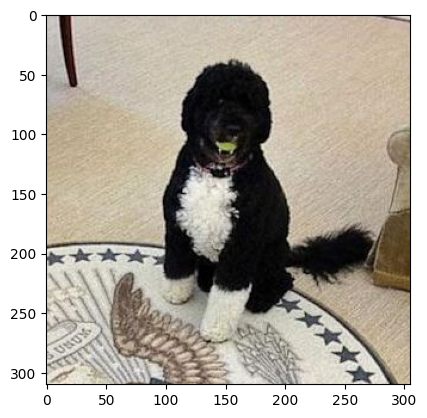

In [51]:
make_prediction(r"C:\Users\arora\Desktop\Desktop\Doggy Door Project\Data\presidential_doggy_door\valid\bo\bo_22.jpg")

6.57853889465332

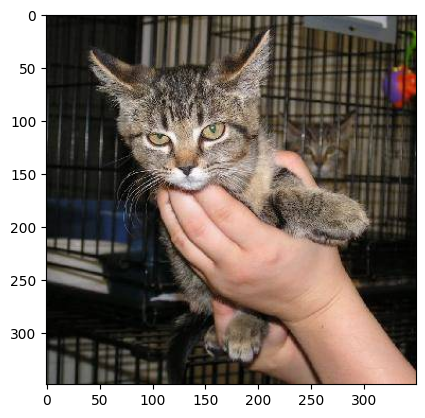

In [52]:
make_prediction(r"C:\Users\arora\Desktop\Desktop\Doggy Door Project\Data\presidential_doggy_door\valid\not_bo\135.jpg")

In [53]:
def personalized_doggy_door(image_path):
    pred = make_prediction(image_path)
    if pred < 0:
        print("It's Bo! Let him in!")
    else:
        print("That's not Bo! Stay out!")

That's not Bo! Stay out!


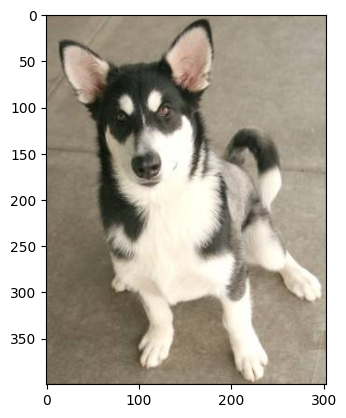

In [54]:
personalized_doggy_door(r"C:\Users\arora\Desktop\Desktop\Doggy Door Project\Data\presidential_doggy_door\valid\not_bo\132.jpg")

It's Bo! Let him in!


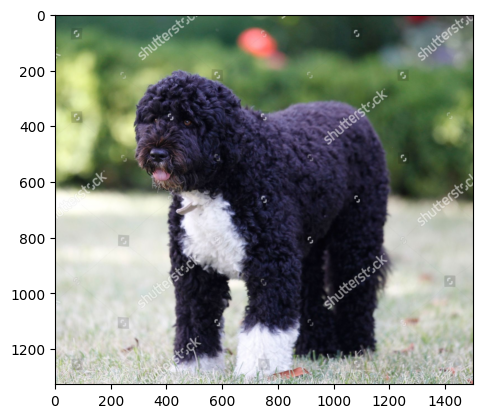

In [57]:
personalized_doggy_door(r"C:\Users\arora\Desktop\Desktop\Doggy Door Project\Data\presidential_doggy_door\train\bo\bo_12.jpg")